<a href="https://colab.research.google.com/github/WendyOira/WEEK-4-INDEPENDENT-PROJECT/blob/main/Independent_project_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WEEK 4 INDEPENDENT PROJECT**





**Import Libraries**

In [ ]:
# Import Pandas
import pandas as pd
#
#Import Numpy
import numpy as np
#
# Import datetime module
from datetime import datetime

**Import our data**

In [ ]:
# We will upload our dataset
autolib=pd.read_csv('http://bit.ly/autolib_dataset')

In [ ]:
# Preview the dataset
autolib.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


**Accessing Information about the Dataset**

This will help us get a quick overview of our dataset



In [ ]:
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [ ]:
autolib.shape

(5000, 25)

We have 5,000 rows and 25 *columns*


In [ ]:
# View statistical data
autolib.describe()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


In [ ]:
# View all the columns in the dataset
autolib.columns

Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City',
       'Displayed comment', 'ID', 'Kind', 'Geo point', 'Postal code',
       'Public name', 'Rental status', 'Scheduled at', 'Slots', 'Station type',
       'Status', 'Subscription status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [ ]:
# View all the entries in the dataset
autolib.values

array([['2 Avenue de Suffren', 0, 0, ..., 8, 11, 43],
       ['145 Rue Raymond Losserand', 6, 6, ..., 6, 7, 24],
       ['2 Avenue John Fitzgerald Kennedy', 3, 3, ..., 3, 20, 14],
       ...,
       ['142 rue du Bac', 1, 1, ..., 1, 7, 1],
       ['2 avenue du Val de Fontenay', 2, 2, ..., 4, 17, 27],
       ['5 Rue Henry Brisson', 4, 4, ..., 8, 10, 2]], dtype=object)

**Data Cleaning**

Validity

In [ ]:
# We will start by removing columns that we will not be using 
autolib.drop(['Charge Slots','Charging Status','Displayed comment','ID','Geo point','Scheduled at','Subscription status'],axis=1,inplace=True)


In [ ]:
# View the changes made
autolib.head(3)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2,station,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,2018,4,3,20,14


In [ ]:
# We will remove any white space before and after our string 
autolib['Address']=autolib['Address'].str.strip()
autolib['City']=autolib['City'].str.strip()
autolib['Public name']=autolib['Public name'].str.strip()
autolib['Rental status']=autolib['Rental status'].str.strip()
autolib['Station type']=autolib['Station type'].str.strip()

In [ ]:
# Let's view the changes made
autolib.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2,station,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,ok,2018,4,8,17,23


Accuracy

In [ ]:
# Cars column should be the total sum of Bluecar counter column, Utilib counter column and Utilib 1.4 counter column
autolib['Cars']= autolib['Bluecar counter'] + autolib['Utilib counter'] + autolib['Utilib 1.4 counter']

**Completeness**

In [ ]:
# We will check and count the missing values in our dataset
autolib.isnull().any()

Address               False
Cars                  False
Bluecar counter       False
Utilib counter        False
Utilib 1.4 counter    False
City                  False
Kind                  False
Postal code           False
Public name           False
Rental status         False
Slots                 False
Station type          False
Status                False
year                  False
month                 False
day                   False
hour                  False
minute                False
dtype: bool

In [ ]:
autolib.isnull().sum().sum()

0

There are no missing values in the dataset

**Consistency**

In [ ]:
# Let's check for any duplicates in our dataset
duplicates=autolib.duplicated().sum().sum()
duplicates

0

There are no duplicates in our dataset

**Uniformity**

In [ ]:
# For column name consistency we will start all column names with a capital letter
autolib.columns=autolib.columns.str.capitalize()
# Lets confirm the changes
autolib.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Year,Month,Day,Hour,Minute
0,2 Avenue de Suffren,0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2,station,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,5,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,4,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,ok,2018,4,8,17,23


In [ ]:
# We shall rename Bluecar counter to Bluecar, Utilib counter to Utilib and Utilib 1.4 counter to Utilib 1.4
autolib.rename(columns={'Bluecar counter':'Bluecar','Utilib counter': 'Utilib','Utilib 1.4 counter':'Utilib 1.4'},inplace=True)

In [ ]:
# Let's view the changes made
autolib.head()

,Address,Cars,Bluecar,Utilib,Utilib 1.4,City,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Year,Month,Day,Hour,Minute
0,2 Avenue de Suffren,0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2,station,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,5,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,4,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,ok,2018,4,8,17,23


In [ ]:
# lets also view all colmuns in our dataset
autolib.columns

Index(['Address', 'Cars', 'Bluecar', 'Utilib', 'Utilib 1.4', 'City', 'Kind',
       'Postal code', 'Public name', 'Rental status', 'Slots', 'Station type',
       'Status', 'Year', 'Month', 'Day', 'Hour', 'Minute'],
      dtype='object')

In [ ]:
# We need to merge the Year, Month and Day columns to create dates
# First I will change their data types to sting then merge them 
autolib['Year']=autolib['Year'].astype(str)
autolib['Month']=autolib['Month'].astype(str)
autolib['Day']=autolib['Day'].astype(str)
# We will confirm changes made
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Address        5000 non-null   object
 1   Cars           5000 non-null   int64 
 2   Bluecar        5000 non-null   int64 
 3   Utilib         5000 non-null   int64 
 4   Utilib 1.4     5000 non-null   int64 
 5   City           5000 non-null   object
 6   Kind           5000 non-null   object
 7   Postal code    5000 non-null   int64 
 8   Public name    5000 non-null   object
 9   Rental status  5000 non-null   object
 10  Slots          5000 non-null   int64 
 11  Station type   5000 non-null   object
 12  Status         5000 non-null   object
 13  Year           5000 non-null   object
 14  Month          5000 non-null   object
 15  Day            5000 non-null   object
 16  Hour           5000 non-null   int64 
 17  Minute         5000 non-null   int64 
dtypes: int64(8), object(10)
memo

In [ ]:
# Merge the Year, Month and Day columns to create a new column called Date
autolib['Date']=pd.to_datetime(autolib['Year'] + '/' + autolib['Month'] + '/' + autolib['Day'])

In [ ]:
# Confirm the Date column is in the correct data type
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Address        5000 non-null   object        
 1   Cars           5000 non-null   int64         
 2   Bluecar        5000 non-null   int64         
 3   Utilib         5000 non-null   int64         
 4   Utilib 1.4     5000 non-null   int64         
 5   City           5000 non-null   object        
 6   Kind           5000 non-null   object        
 7   Postal code    5000 non-null   int64         
 8   Public name    5000 non-null   object        
 9   Rental status  5000 non-null   object        
 10  Slots          5000 non-null   int64         
 11  Station type   5000 non-null   object        
 12  Status         5000 non-null   object        
 13  Year           5000 non-null   object        
 14  Month          5000 non-null   object        
 15  Day            5000 n

In [ ]:
# Since we now have the date column we can drop Year, Month and Day columns 
autolib.drop(columns=['Year','Month','Day'], inplace=True)
# Confirm changes made
autolib.head()

,Address,Cars,Bluecar,Utilib,Utilib 1.4,City,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Hour,Minute,Date
0,2 Avenue de Suffren,0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2,station,ok,11,43,2018-04-08
1,145 Rue Raymond Losserand,6,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,7,24,2018-04-06
2,2 Avenue John Fitzgerald Kennedy,5,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,20,14,2018-04-03
3,51 Rue EugÃ¨ne OudinÃ©,4,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,4,37,2018-04-04
4,6 avenue de la Porte de Champerret,3,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,ok,17,23,2018-04-08


**Outliers**

In [ ]:
# Lets identify any outliers 
# We will use box plots for illustrutions
# Lets start by importing Matplotlib
#
import matplotlib.pyplot as plt 
% matplotlib inline 

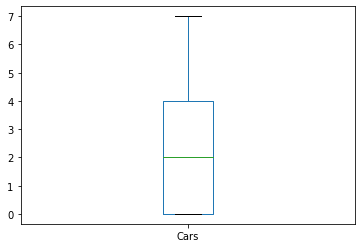

In [ ]:
# Let's check for outliers in the Cars column
autolib.boxplot(column =['Cars'], grid = False) 
# 
# There are no outliers

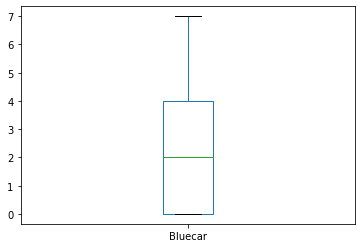

In [ ]:
# Let's check for outliers in the Bluecar column
autolib.boxplot(column =['Bluecar'], grid = False)
#
# There are no outliers

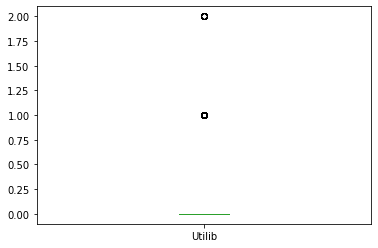

In [ ]:
# Let's check for outliers in the Utilib column
autolib.boxplot(column =['Utilib'], grid = False)
#
# There are outliers which will not be deleted because they are important in our analysis

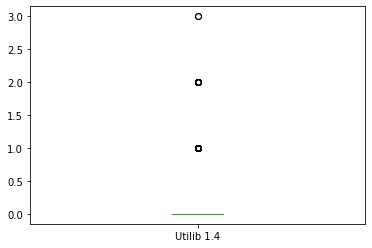

In [ ]:
# Let's check for outliers in the Utilib 1.4 column
autolib.boxplot(column =['Utilib 1.4'], grid = False)
#
# There are outliers which will not be deleted because they are important in our analysis

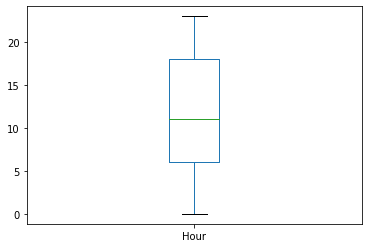

In [ ]:
# Let's check for outliers in the Hour column
autolib.boxplot(column =['Hour'], grid = False)
#
# There are no outliers

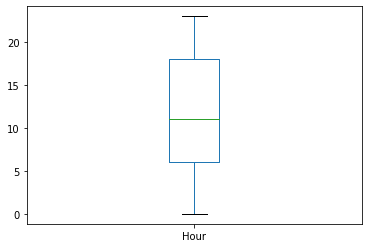

In [ ]:
# Let's check for outliers in the Hour column
autolib.boxplot(column =['Hour'], grid = False)
#
# There are no outliers

Let's answer the research question

Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018

In [ ]:
# Most popular hour is when most Bluecars have been rented out of the station
# 
paris=autolib[(autolib['City']=='Paris') & (autolib['Date'] <= '2018-04-30') & (autolib['Date']>= '2018-04-01') & (autolib['Rental status']=='operational')]
paris.groupby(['Hour'])['Bluecar'].sum().sort_values(ascending=False).head()
#
# It is the 21st hour of the day

Hour
21    268
6     260
12    250
9     250
3     242
Name: Bluecar, dtype: int64

Bonus Questions

What is the most popular hour for returning cars?

In [ ]:
# This when parking slots are filled up
#
popular_hour=autolib[(autolib['Rental status']=='operational') & (autolib['Slots']==7)]
popular_hour.groupby(['Hour'])['Slots'].sum().sort_values(ascending=False).head(1)
#
# It is the 14th hour of the day

Hour
14    21
Name: Slots, dtype: int64

What station is the most popular?



In [ ]:
# This is the station with where most cars have been rented out
# 
station=autolib[(autolib['Rental status']=='operational')]
station.groupby(['Public name'])['Cars'].sum().sort_values(ascending=False)
#
# There are 2 popular stations are Fontenay-aux-Roses/Robert Marchand/32 and Paris/Porte de Montrouge/8 

Public name
Fontenay-aux-Roses/Robert Marchand/32     50
Paris/Porte de Montrouge/8                50
Le Plessis-Robinson/GalilÃ©e/16           49
Fontenay-aux-Roses/Lombard/20             48
Fontenay-aux-Roses/Division Leclerc/31    46
                                          ..
Paris/Rochambeau/6                         0
Epinay-sur-Seine/Argenteuil/28             0
Paris/Berbier du Mets/26                   0
Paris/Dutuit/1                             0
Paris/Notre-Dame des Champs/39             0
Name: Cars, Length: 1026, dtype: int64

What station is the most popular station at the most popular picking hour?

In [ ]:
# We first have to calculate the most popular picking hour
# This is the hour when most cars have been rented out
#
picking_hour=autolib[(autolib['Rental status']=='operational')]
print(picking_hour.groupby(['Hour'])['Cars'].sum().sort_values(ascending=False).head(1))
# We will filter out the most popular station at the 6th hour of the day
#
popular_picking_hour=autolib[(autolib['Hour']==6)]
popular_picking_hour.groupby(['Public name'])['Cars'].sum().sort_values(ascending=False)
#
# Garches/Raymond PoincarÃ©/102 & Clichy-la-Garenne/Jean JaureÌs/122 are the most popular stations at the most popular hour (6th hour of the day)

Hour
6    654
Name: Cars, dtype: int64


Public name
Garches/Raymond PoincarÃ©/102                   11
Clichy-la-Garenne/Jean JaureÌs/122             11
La Garenne-Colombes/Verdun/41                    9
Le Plessis-Robinson/ChaussÃ©e de l'Etang/109     9
Paris/Julien Lacroix/39                          9
                                                ..
Limeil-BrÃ©vannes/Lavoisier/12                   0
Paris/Francois 1er/7                             0
Paris/Saint Roch/3                               0
Paris/Henri IV/46                                0
Paris/Victoria/17                                0
Name: Cars, Length: 200, dtype: int64

What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?

In [ ]:
# Postal code where most Blue cars are rented out
#
bluecar=autolib[(autolib['Rental status']=='operational')]
bluecar.groupby(['Public name','Postal code'])['Bluecar'].sum().sort_values(ascending=False).head()
#
# 92260 is the postal code most popular for picking up Blue cars

Public name                             Postal code
Fontenay-aux-Roses/Robert Marchand/32   92260          50
Le Plessis-Robinson/GalilÃ©e/16         92350          49
Fontenay-aux-Roses/Lombard/20           92260          47
Fontenay-aux-Roses/Division Leclerc/31  92260          43
Paris/Philippe Auguste/126              75011          42
Name: Bluecar, dtype: int64

In [ ]:
# We will now confirm the postal code of the most popular station
#
station.groupby(['Public name','Postal code'])['Cars'].sum().sort_values(ascending=False)
#
# 92260 and 75014 are the postal codes for the most popular stations

Public name                             Postal code
Fontenay-aux-Roses/Robert Marchand/32   92260          50
Paris/Porte de Montrouge/8              75014          50
Le Plessis-Robinson/GalilÃ©e/16         92350          49
Fontenay-aux-Roses/Lombard/20           92260          48
Fontenay-aux-Roses/Division Leclerc/31  92260          46
                                                       ..
Paris/Rochambeau/6                      75009           0
Epinay-sur-Seine/Argenteuil/28          93800           0
Paris/Berbier du Mets/26                75013           0
Paris/Dutuit/1                          75008           0
Paris/Notre-Dame des Champs/39          75006           0
Name: Cars, Length: 1026, dtype: int64

Both postal codes are similar i.e 92260

What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?At the most popular picking hour?

In [ ]:
# We already deduced that the most popular picking hour is 6
popular_picking_hour.groupby(['Public name','Postal code'])['Cars'].sum().sort_values(ascending=False)
#
# 92380 and 92210 are the postal codes for the most popular stations at the most popular picking hour 

Public name                                   Postal code
Garches/Raymond PoincarÃ©/102                 92380          11
Clichy-la-Garenne/Jean JaureÌs/122           92210          11
La Garenne-Colombes/Verdun/41                 92250           9
Le Plessis-Robinson/ChaussÃ©e de l'Etang/109  92350           9
Paris/Julien Lacroix/39                       75020           9
                                                             ..
Limeil-BrÃ©vannes/Lavoisier/12                94450           0
Paris/Francois 1er/7                          75008           0
Paris/Saint Roch/3                            75001           0
Paris/Henri IV/46                             75004           0
Paris/Victoria/17                             75001           0
Name: Cars, Length: 200, dtype: int64

The most popular stations at the most popular picking hour is not similar to the postal code most popular for picking up Bluecars

Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 

In [ ]:
# We will calculate the postal code popular for picking up Utilib
utilib=autolib[(autolib['Rental status']=='operational')]
utilib.groupby(['Public name','Postal code'])['Utilib'].sum().sort_values(ascending=False).head()
#
# The popular postal codes are 92360,92230,75014,75017

Public name                    Postal code
Paris/Mac Mahon/5              75017          4
Paris/Porte de Montrouge/8     75014          4
Gennevilliers/Petits marais/4  92230          4
Meudon/MarÃ©chal Juin/18       92360          4
Paris/Arago/99                 75014          3
Name: Utilib, dtype: int64

There are similaries with the postal code for the most popular station i.e 75014

In [ ]:
# We will calculate the postal code popular for picking up Utilib 1.4
utilib_1=autolib[(autolib['Rental status']=='operational')]
utilib_1.groupby(['Public name','Postal code'])['Utilib 1.4'].sum().sort_values(ascending=False).head()
#
#The popular postal codes is 92310

Public name                              Postal code
SÃ¨vres/Grande Rue/123                   92310          9
Paris/Porte de Montrouge/8               75014          7
SÃ¨vres/WolfenbÃ¼ttel/1                  92310          7
Boulogne-Billancourt/AndrÃ© Morizet/121  92100          4
Nanterre/Ecoles/5                        92000          4
Name: Utilib 1.4, dtype: int64

There are no similarities between the postal code for the most popular picking station and the postal code for the most popular picking station at the most popular picking hour